In [ ]:
!pip install indic-nlp-library
!pip3 install -U git+https://github.com/aboSamoor/polyglot.git@master
!polyglot download morph2.hi
!polyglot download morph2.en
import requests
from sys import getsizeof
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from spacy.lang.en import English
from indicnlp.tokenize import sentence_tokenize, indic_tokenize
from spacy.lang.hi import Hindi
import matplotlib.pyplot as plt
import numpy as np
from nltk.stem import PorterStemmer 
from polyglot.text import Text, Word
from nltk import word_tokenize, pos_tag
import random
import collections
from IPython.display import display, Markdown
import warnings
import matplotlib.patches as mpatches
warnings.filterwarnings('ignore')

  Cloning https://github.com/aboSamoor/polyglot.git (to revision master) to /tmp/pip-req-build-h7u9i8o1
  Running command git clone -q https://github.com/aboSamoor/polyglot.git /tmp/pip-req-build-h7u9i8o1
     |████████████████████████████████| 41.4MB 73kB/s 
     |████████████████████████████████| 235kB 42.6MB/s 
  Created wheel for polyglot: filename=polyglot-16.7.4-py2.py3-none-any.whl size=70642 sha256=9d953248bd0074fa46860d86523b9cefdac6be4cf01fab304dea82932c69b579
  Stored in directory: /tmp/pip-ephem-wheel-cache-3zwgq0eh/wheels/42/d9/73/345c7ae8554299ff8b31635d64eb8455fd591385fa734cdbef
  Created wheel for pycld2: filename=pycld2-0.41-cp36-cp36m-linux_x86_64.whl size=9833514 sha256=1550faecdc66dc411244af3574edff7abf36b2a6ea5112ab34f1eb99bc737759
  Stored in directory: /root/.cache/pip/wheels/c6/8f/e9/08a1a8932a490175bd140206cd86a3dbcfc70498100de11079
  Created wheel for PyICU: filename=PyICU-2.5-cp36-cp36m-linux_x86_64.whl size=1252643 sha256=cb01c03f1aa85cfbd0802fa43e8ce315d640

In [ ]:
#Downloading the Corpus
en_url = "https://drive.google.com/file/d/1H3cNxmsG8k79Vr3FkSa0hkLcC2AGIxSy/view?usp=sharing"
en_url_down = "https://drive.google.com/uc?export=download&id=1H3cNxmsG8k79Vr3FkSa0hkLcC2AGIxSy"
hi_url = "https://drive.google.com/file/d/1a19UH6TkkJYrlft59KTgXyxf8V8WYUy_/view?usp=sharing"
hi_url_down = "https://drive.google.com/uc?export=download&id=1a19UH6TkkJYrlft59KTgXyxf8V8WYUy_"

response = requests.get(en_url_down)
en_data = response.text
en_data = en_data[: len(en_data) // 2]
response = requests.get(hi_url_down)
response.encoding = "utf-8"
hi_data = response.text
hi_data = hi_data[: len(hi_data) // 2]

# Task 1.3.1
## English Corpus

In [ ]:
####################################  Task 1.3.1 (1) English  ####################################
#sentence segmentation and word tokenisation using NLTK on en_wiki.txt

nltk_en_sentences = nltk.sent_tokenize(en_data)
display(Markdown("##Using NLTK on English corpus."))
display(Markdown("###Number of sentences after performing sentence segmentation: {}".format(str(len(nltk_en_sentences)))))
display(Markdown("### Some of examples are:"))
# print("Using NLTK on English corpus.")
# print("Number of sentences after performing sentence segmentation: " + str(len(nltk_en_sentences)))
# print("Some examples of sentences are:")
print(nltk_en_sentences[0:10])

nltk_en_tokens = nltk.word_tokenize(en_data)
display(Markdown("###Number of tokens after performing word tokenisation: {}".format( str(len(nltk_en_tokens)))))
display(Markdown("###Some examples of tokens are:"))
print(nltk_en_tokens[0:10])


#sentence segmentation and word tokenisation using spaCy on en_wiki.txt
nlp = English()
sentencizer = nlp.create_pipe("sentencizer")
nlp.max_length = 103100000 # or even higher
nlp.add_pipe(sentencizer)
doc = nlp(en_data)
spacy_en_sentences = list(doc.sents)
display(Markdown("##Using spaCy on English corpus."))
display(Markdown("###Number of sentences after performing sentence segmentation: {}".format(str(len(spacy_en_sentences)))))
display(Markdown("### Some of examples are:"))
print(spacy_en_sentences[0:10])

tokenizer = nlp.Defaults.create_tokenizer(nlp)
spacy_en_tokens = tokenizer(en_data)
display(Markdown("###Number of tokens after performing word tokenisation: {}".format(str(len(spacy_en_tokens)))))
display(Markdown("###Some examples of tokens are:"))
print(*spacy_en_tokens[0:10], sep=',')

# to free some space in RAM
del nltk_en_sentences, spacy_en_sentences, spacy_en_tokens


##Using NLTK on English corpus.

###Number of sentences after performing sentence segmentation: 397072

### Some of examples are:

['The word "atom" was coined by ancient Greek philosophers.', 'However, these ideas were founded in philosophical and theological reasoning rather than evidence and experimentation.', 'As a result, their views on what atoms look like and how they behave were incorrect.', 'They also could not convince everybody, so atomism was but one of a number of competing theories on the nature of matter.', 'It was not until the 19th century that the idea was embraced and refined by scientists, when the blossoming science of chemistry produced discoveries that only the concept of atoms could explain.', 'In the early 1800s, John Dalton used the concept of atoms to explain why elements always react in ratios of small whole numbers (the law of multiple proportions).', 'For instance, there are two types of tin oxide: one is 88.1% tin and 11.9% oxygen and the other is 78.7% tin and 21.3% oxygen (tin(II) oxide and tin dioxide respectively).', 'This means that 100g of tin will combine either with 13.5g or 

###Number of tokens after performing word tokenisation: 9936739

###Some examples of tokens are:

['The', 'word', '``', 'atom', "''", 'was', 'coined', 'by', 'ancient', 'Greek']


##Using spaCy on English corpus.

###Number of sentences after performing sentence segmentation: 394417

### Some of examples are:

[The word "atom" was coined by ancient Greek philosophers., However, these ideas were founded in philosophical and theological reasoning rather than evidence and experimentation., As a result, their views on what atoms look like and how they behave were incorrect., They also could not convince everybody, so atomism was but one of a number of competing theories on the nature of matter., It was not until the 19th century that the idea was embraced and refined by scientists, when the blossoming science of chemistry produced discoveries that only the concept of atoms could explain., 

In the early 1800s, John Dalton used the concept of atoms to explain why elements always react in ratios of small whole numbers (the law of multiple proportions)., For instance, there are two types of tin oxide: one is 88.1% tin and 11.9% oxygen and the other is 78.7% tin and 21.3% oxygen (tin(II) oxide and tin dioxide respectively)., This means that 100g of tin will combine either with 13.5g or 27g of oxygen

###Number of tokens after performing word tokenisation: 10255199

###Some examples of tokens are:

The,word,",atom,",was,coined,by,ancient,Greek


## Hindi Corpus

In [ ]:
####################################  Task 1.3.1 (1) Hindi  ####################################

#sentence segmentation and word tokenisation using indicNLP on hi_wiki.txt
indicNLP_hi_sentences = sentence_tokenize.sentence_split(hi_data, lang='hi')
display(Markdown("##Using indicNLP on Hindi corpus."))
display(Markdown("###Number of sentences after performing sentence segmentation: {}".format(str(len(indicNLP_hi_sentences)))))
display(Markdown("###Some examples of sentences are:"))
print(indicNLP_hi_sentences[0:10])

indicNLP_hi_tokens = indic_tokenize.trivial_tokenize(hi_data, lang='hi')
display(Markdown("###Number of tokens after performing word tokenisation: {}".format(str(len(indicNLP_hi_tokens)))))
display(Markdown("###Some examples of tokens are:"))
print(indicNLP_hi_tokens[0:10])

#sentence segmentation and word tokenisation using spaCy on hi_wiki.txt
nlp = Hindi()
sentencizer = nlp.create_pipe("sentencizer")
nlp.max_length = 103100000 # or even higher
nlp.add_pipe(sentencizer)
doc = nlp(hi_data)
spacy_hi_sentences = list(doc.sents)
display(Markdown("##Using spaCy on Hindi corpus."))
display(Markdown("###Number of sentences after performing sentence segmentation: {}".format(str(len(spacy_hi_sentences)))))
display(Markdown("###Some examples of sentences are:"))
print(spacy_hi_sentences[0:10])

tokenizer = nlp.Defaults.create_tokenizer(nlp)
spacy_hi_tokens = tokenizer(hi_data)
display(Markdown("###Number of tokens after performing word tokenisation: {}".format(str(len(spacy_hi_tokens)))))
display(Markdown("###Some examples of tokens are:"))
print(*spacy_hi_tokens[0:10], sep=',')
 

del indicNLP_hi_sentences, spacy_hi_sentences, spacy_hi_tokens

##Using indicNLP on Hindi corpus.

###Number of sentences after performing sentence segmentation: 175117

###Some examples of sentences are:

['मास्टर ऑफ़ हेल्थ एडमिनिस्ट्रेशन या मास्टर ऑफ हेल्थकेयर एडमिनिस्ट्रेशन (एमएचए या एम. एच. ए) स्नातकोत्तर (पोस्ट ग्रेजुएशन) की एक पेशेवर डिग्री है जो स्वास्थ्य प्रशासन के क्षेत्र में दी जाती हैं।', 'यह उन छात्रों को प्रदान की जाती हैं जिन्होंने स्वास्थ्य प्रशासन, अस्पताल प्रबंधन एवं अन्य स्वास्थ्य सेवा संगठनों के क्षेत्र में जरूरी ज्ञान और दक्षता हासिल की हैं।', 'इन पाठ्यक्रमो में परिस्थितियों के अनुसार इनके सरंचना में अंतर हो सकता हैं हालांकि व्यवसायी-शिक्षक मॉडल कार्यक्रम आमतौर पर चिकित्सा, स्वास्थ्य व्यवसायों या संबद्ध स्वास्थ्य के कॉलेजों में पाए जाते हैं, कक्षा-आधारित कार्यक्रम व्यवसाय या सार्वजनिक स्वास्थ्य के कॉलेजों में होते हैं।', 'इस पाठ्यक्रम के अध्ययन के दौरान आम तौर पर विद्यार्थियों को जनसंख्या स्वास्थ्य, स्वास्थ्य देखभाल अर्थशास्त्र, स्वास्थ्य नीति, संगठनात्मक व्यवहार, स्वास्थ्य से जुड़े संगठनों के प्रबंधन, स्वास्थ्य विपणन और संचार, मानव संसाधन प्रबंधन, सूचना प्रणाली प्रबंधन के अध्ययन एवं अन्य क्षेत्रों में व्यावहारिक अनुभव की भी आवश्यकता होती है।', 'यह डिग्री प्रोग्राम स्

###Number of tokens after performing word tokenisation: 4315181

###Some examples of tokens are:

['मास्टर', 'ऑफ़', 'हेल्थ', 'एडमिनिस्ट्रेशन', 'या', 'मास्टर', 'ऑफ', 'हेल्थकेयर', 'एडमिनिस्ट्रेशन', '(']


##Using spaCy on Hindi corpus.

###Number of sentences after performing sentence segmentation: 178911

###Some examples of sentences are:

[मास्टर ऑफ़ हेल्थ एडमिनिस्ट्रेशन या मास्टर ऑफ हेल्थकेयर एडमिनिस्ट्रेशन (एमएचए या एम., एच., ए) स्नातकोत्तर (पोस्ट ग्रेजुएशन) की एक पेशेवर डिग्री है जो स्वास्थ्य प्रशासन के क्षेत्र में दी जाती हैं।, यह उन छात्रों को प्रदान की जाती हैं जिन्होंने स्वास्थ्य प्रशासन, अस्पताल प्रबंधन एवं अन्य स्वास्थ्य सेवा संगठनों के क्षेत्र में जरूरी ज्ञान और दक्षता हासिल की हैं।, इन पाठ्यक्रमो में परिस्थितियों के अनुसार इनके सरंचना में अंतर हो सकता हैं हालांकि व्यवसायी-शिक्षक मॉडल कार्यक्रम आमतौर पर चिकित्सा, स्वास्थ्य व्यवसायों या संबद्ध स्वास्थ्य के कॉलेजों में पाए जाते हैं, कक्षा-आधारित कार्यक्रम व्यवसाय या सार्वजनिक स्वास्थ्य के कॉलेजों में होते हैं।, 

इस पाठ्यक्रम के अध्ययन के दौरान आम तौर पर विद्यार्थियों को जनसंख्या स्वास्थ्य, स्वास्थ्य देखभाल अर्थशास्त्र, स्वास्थ्य नीति, संगठनात्मक व्यवहार, स्वास्थ्य से जुड़े संगठनों के प्रबंधन, स्वास्थ्य विपणन और संचार, मानव संसाधन प्रबंधन, सूचना प्रणाली प्रबंधन के अध्ययन एवं अन्य क्षेत्रों में व्यावहारिक अनुभव की भी आवश्यकता होती है।, यह डिग्री प्रोग्राम स्वास्थ

###Number of tokens after performing word tokenisation: 4356434

###Some examples of tokens are:

मास्टर,ऑफ़,हेल्थ,एडमिनिस्ट्रेशन,या,मास्टर,ऑफ,हेल्थकेयर,एडमिनिस्ट्रेशन,(


## Frequency Distributions and Zipf's Law

####Number of english unigrams: 252518

####Number of english bigrams: 2291666

####Number of english trigrams: 5490720

####Number of hindi unigrams: 197753

####Number of hindi bigrams: 1386422

####Number of hindi trigrams: 2949111

###Unigram frequency distribution of english corpus 

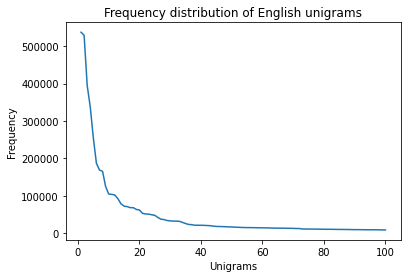

###Unigram frequency distribution of hindi corpus 

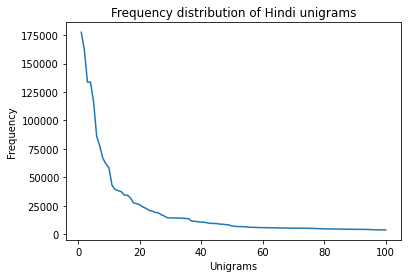

###Bigram frequency distribution of english corpus 

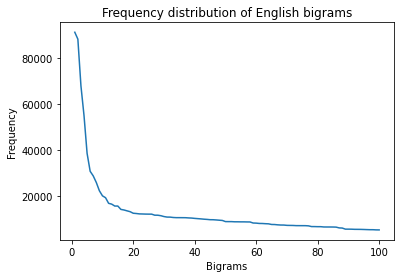

###Bigram frequency distribution of hindi corpus 

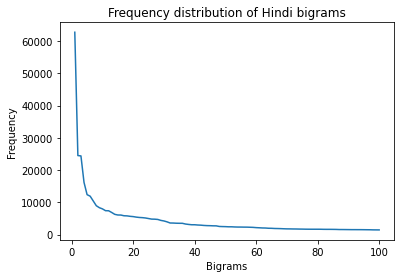

###Trigram frequency distribution of english corpus 

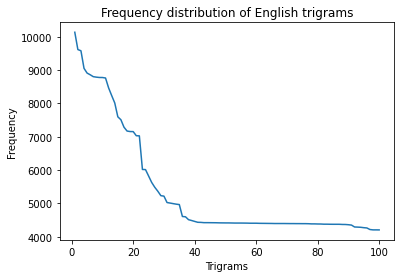

###Trigram frequency distribution of hindi corpus 

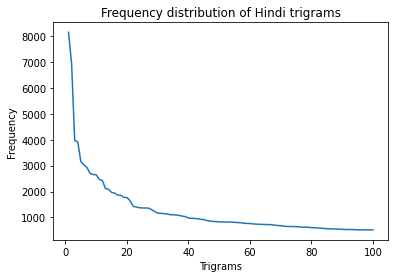

###Zipf's Law(English Corpus)

####Approximate straight line has slope = -1.3632912841002662 and y-intercept = 16.52330873933697

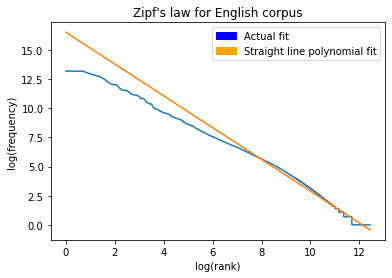

###Zipf's Law(Hindi Corpus)

####Approximate straight line has slope = -1.1737064184389572 and y-intercept = 13.846670757909154

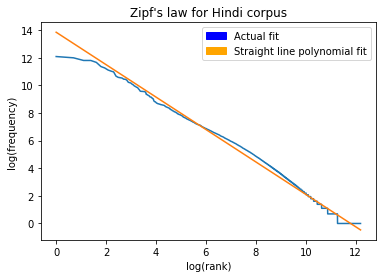

In [ ]:
####################################  Task 1.3.1 (2, 3, 4) ####################################
# function to caculate n-grams and return them as a dictionary, with key as n-gram and value as its frequency in the corpus
def ngrams(tokens, n):
  output = {}
  for i in range(len(tokens)-n+1):
    g = ' '.join(tokens[i:i+n])
    output.setdefault(g, 0)
    output[g] += 1
  return output

# Using tokens from nltk for n-gram calculation for en_wiki.txt
en_unigrams = ngrams(nltk_en_tokens, 1)
en_bigrams = ngrams(nltk_en_tokens, 2)
en_trigrams = ngrams(nltk_en_tokens, 3)

# Using indic-nlp tokens for n-gram calculation for hi_wiki.txt
hi_unigrams = ngrams(indicNLP_hi_tokens, 1)
hi_bigrams = ngrams(indicNLP_hi_tokens, 2)
hi_trigrams = ngrams(indicNLP_hi_tokens, 3)

# Number of items in various n-grams
display(Markdown("####Number of english unigrams: {}".format(str(len(en_unigrams)))))
display(Markdown("####Number of english bigrams: {}".format(str(len(en_bigrams)))))
display(Markdown("####Number of english trigrams: {}".format(str(len(en_trigrams)))))
display(Markdown("####Number of hindi unigrams: {}".format(str(len(hi_unigrams)))))
display(Markdown("####Number of hindi bigrams: {}".format(str(len(hi_bigrams)))))
display(Markdown("####Number of hindi trigrams: {}".format(str(len(hi_trigrams)))))


# Plotting only 100 n-grams in each category otherwise it will lead to no memory

# Plotting unigram frequency distribution of english corpus
display(Markdown("###Unigram frequency distribution of english corpus "))
sorted100_en_unigrams = sorted(en_unigrams.items(), key=lambda x: x[1], reverse=True)[:100]
ids = [x for x in range(1, 101, 1)]
y = [v for k, v in sorted(en_unigrams.items(), key=lambda x: x[1], reverse=True)[:100]]
# x, y = zip(*sorted100_en_unigrams)
plt.plot(ids, y)
plt.xlabel("Unigrams") 
plt.ylabel("Frequency") 
plt.title("Frequency distribution of English unigrams") 
plt.show()

# Plotting unigram frequency distribution of hindi corpus 
display(Markdown("###Unigram frequency distribution of hindi corpus "))
sorted100_hi_unigrams = sorted(hi_unigrams.items(), key=lambda x: x[1], reverse=True)[:100]
# x, y = zip(*sorted100_hi_unigrams)
y = [v for k, v in sorted(hi_unigrams.items(), key=lambda x: x[1], reverse=True)[:100]]
plt.plot(ids, y)
plt.xlabel("Unigrams") 
plt.ylabel("Frequency") 
plt.title("Frequency distribution of Hindi unigrams") 
plt.show()

# ########################################################################################

# Plotting bigram frequency distribution of english corpus
display(Markdown("###Bigram frequency distribution of english corpus "))
sorted100_en_bigrams = sorted(en_bigrams.items(), key=lambda x: x[1], reverse=True)[:100]
# x, y = zip(*sorted100_en_bigrams)
y = [v for k, v in sorted(en_bigrams.items(), key=lambda x: x[1], reverse=True)[:100]]
plt.plot(ids, y)
plt.xlabel("Bigrams") 
plt.ylabel("Frequency") 
plt.title("Frequency distribution of English bigrams") 
plt.show()

# Plotting bigram frequency distribution of hindi corpus 
display(Markdown("###Bigram frequency distribution of hindi corpus "))
sorted100_hi_bigrams = sorted(hi_bigrams.items(), key=lambda x: x[1], reverse=True)[:100]
# x, y = zip(*sorted100_hi_bigrams)
y = [v for k, v in sorted(hi_bigrams.items(), key=lambda x: x[1], reverse=True)[:100]]
plt.plot(ids, y)
plt.xlabel("Bigrams") 
plt.ylabel("Frequency") 
plt.title("Frequency distribution of Hindi bigrams") 
plt.show()

# ########################################################################################

# Plotting unigram frequency distribution of english corpus
display(Markdown("###Trigram frequency distribution of english corpus "))
sorted100_en_trigrams = sorted(en_trigrams.items(), key=lambda x: x[1], reverse=True)[:100]
# x, y = zip(*sorted100_en_trigrams)
y = [v for k, v in sorted(en_trigrams.items(), key=lambda x: x[1], reverse=True)[:100]]
plt.plot(ids, y)
plt.xlabel("Trigrams") 
plt.ylabel("Frequency") 
plt.title("Frequency distribution of English trigrams") 
plt.show()

# Plotting unigram frequency distribution of hindi corpus 
display(Markdown("###Trigram frequency distribution of hindi corpus "))
sorted100_hi_trigrams = sorted(hi_trigrams.items(), key=lambda x: x[1], reverse=True)[:100]
# x, y = zip(*sorted100_hi_trigrams)
y = [v for k, v in sorted(hi_trigrams.items(), key=lambda x: x[1], reverse=True)[:100]]
plt.plot(ids, y)
plt.xlabel("Trigrams") 
plt.ylabel("Frequency") 
plt.title("Frequency distribution of Hindi trigrams") 
plt.show()


####################################  Zipf's Law (English)####################################
x = [np.log(x) for x in range(1, len(en_unigrams)+1)]
y = [np.log(v)for k, v in  sorted(en_unigrams.items(), key=lambda x: x[1], reverse=True)]
x = np.array(x)
y = np.array(y)
slope, intercept = np.polyfit(x, y, 1)
display(Markdown("###Zipf's Law(English Corpus)"))
display(Markdown("####Approximate straight line has slope = {} and y-intercept = {}".format(slope, intercept)))
plt.xlabel("log(rank)")
plt.ylabel("log(frequency)")
plt.title("Zipf's law for English corpus")
blue_patch = mpatches.Patch(color='blue', label='Actual fit')
orange_patch = mpatches.Patch(color='orange', label='Straight line polynomial fit')
plt.legend(handles=[blue_patch, orange_patch])
plt.plot(x, y)
plt.plot(x, slope*x+intercept)
plt.show()

####################################  Zipf's Law (Hindi)####################################
x = [np.log(x) for x in range(1, len(hi_unigrams)+1)]
y = [np.log(v)for k, v in  sorted(hi_unigrams.items(), key=lambda x: x[1], reverse=True)]
x = np.array(x)
y = np.array(y)
slope, intercept = np.polyfit(x, y, 1)
display(Markdown("###Zipf's Law(Hindi Corpus)"))
display(Markdown("####Approximate straight line has slope = {} and y-intercept = {}".format(slope, intercept)))
plt.xlabel("log(rank)")
plt.ylabel("log(frequency)")
plt.title("Zipf's law for Hindi corpus")
blue_patch = mpatches.Patch(color='blue', label='Actual fit')
orange_patch = mpatches.Patch(color='orange', label='Straight line polynomial fit')
plt.legend(handles=[blue_patch, orange_patch])
plt.plot(x, y)
plt.plot(x, slope*x+intercept)
plt.show()


del sorted100_en_unigrams, sorted100_en_bigrams, sorted100_en_trigrams, sorted100_hi_unigrams, sorted100_hi_bigrams, sorted100_hi_trigrams

# Task 1.3.2


In [ ]:
####################################  Task 1.3.2 (1, 2, 3) ####################################
# first sort the dictionary by values in descending order then do the required task with given %coverage 
#TODO: at the moment calculating coverage with wrt respective n-gram, might have to calculate using total words
en_total_unigrams = len(nltk_en_tokens)
en_total_bigrams = len(nltk_en_tokens)-1
en_total_trigrams = len(nltk_en_tokens)-2

hi_total_unigrams = len(indicNLP_hi_tokens)
hi_total_bigrams = len(indicNLP_hi_tokens)-1
hi_total_trigrams = len(indicNLP_hi_tokens)-2

def most_frequent_ngrams_coverage(coverage, total_n_grams, n_gram_dict):
  sorted_n_grams = sorted(n_gram_dict.items(), key=lambda x: x[1], reverse=True)
  count=0
  total_sum=0
  for k, v in sorted_n_grams:
    total_sum+=v
    count+=1
    if total_sum>=coverage*total_n_grams:
      return count
      
display(Markdown("###Before performing stemming on English Corpus:"))
display(Markdown("####Number of (most frequent) uni-grams required for 90% coverage of the selected english corpora: {}".format(str(most_frequent_ngrams_coverage(0.9, en_total_unigrams, en_unigrams)))))
display(Markdown("####Number of (most frequent) bi-grams required for 80% coverage of the selected english corpora: {}".format(str(most_frequent_ngrams_coverage(0.8, en_total_bigrams, en_bigrams)))))
display(Markdown("####Number of (most frequent) tri-grams required for 70% coverage of the selected english corpora: {}".format(str(most_frequent_ngrams_coverage(0.7, en_total_trigrams, en_trigrams)))))
display(Markdown("###Before performing stemming on Hindi Corpus:"))
display(Markdown("####Number of (most frequent) uni-grams required for 90% coverage of the selected hindi corpora: {}".format(str(most_frequent_ngrams_coverage(0.9, hi_total_unigrams, hi_unigrams)))))
display(Markdown("####Number of (most frequent) bi-grams required for 80% coverage of the selected hindi corpora: {}".format(str(most_frequent_ngrams_coverage(0.8, hi_total_bigrams, hi_bigrams)))))
display(Markdown("####Number of (most frequent) tri-grams required for 70% coverage of the selected hindi corpora: {}".format(str(most_frequent_ngrams_coverage(0.7, hi_total_trigrams, hi_trigrams)))))

####################################  Task 1.3.2 (4) ####################################
display(Markdown("###After performing stemming on English Corpus:"))

# Performing stemming on each token in English corpus and calculating n-grams and again

ps = PorterStemmer() 
stemmed_en_tokens = []
for w in nltk_en_tokens:
  stemmed_en_tokens.append(ps.stem(w))

# The n-grams dictionaries 
stemmed_en_unigrams = ngrams(stemmed_en_tokens, 1)
stemmed_en_bigrams = ngrams(stemmed_en_tokens, 2)
stemmed_en_trigrams = ngrams(stemmed_en_tokens, 3)

# Total possible n-grams after stemming
stemmed_total_en_unigrams = len(stemmed_en_tokens)
stemmed_total_en_bigrams = len(stemmed_en_tokens)-1
stemmed_total_en_trigrams = len(stemmed_en_tokens)-2
 
#Calculating the coverage
display(Markdown("####Number of (most frequent) uni-grams required for 90% coverage of the selected english corpora(stemmed): {}".format(str(most_frequent_ngrams_coverage(0.9, stemmed_total_en_unigrams, stemmed_en_unigrams)))))
display(Markdown("####Number of (most frequent) bi-grams required for 80% coverage of the selected english corpora(stemmed): {}".format(str(most_frequent_ngrams_coverage(0.8, stemmed_total_en_bigrams, stemmed_en_bigrams)))))
display(Markdown("####Number of (most frequent) tri-grams required for 70% coverage of the selected english corpora(stemmed): {}".format(str(most_frequent_ngrams_coverage(0.7, stemmed_total_en_trigrams, stemmed_en_trigrams)))))


display(Markdown("###After performing stemming on Hindi Corpus:"))

# Performing stemming on each token in hindi corpus
hi_suffixes = {
    1: ["ो", "े", "ू", "ु", "ी", "ि", "ा"],
    2: ["कर", "ाओ", "िए", "ाई", "ाए", "ने", "नी", "ना", "ते", "ीं", "ती", "ता", "ाँ", "ां", "ों", "ें"],
    3: ["ाकर", "ाइए", "ाईं", "ाया", "ेगी", "ेगा", "ोगी", "ोगे", "ाने", "ाना", "ाते", "ाती", "ाता", "तीं", "ाओं", "ाएं", "ुओं", "ुएं", "ुआं"],
    4: ["ाएगी", "ाएगा", "ाओगी", "ाओगे", "एंगी", "ेंगी", "एंगे", "ेंगे", "ूंगी", "ूंगा", "ातीं", "नाओं", "नाएं", "ताओं", "ताएं", "ियाँ", "ियों", "ियां"],
    5: ["ाएंगी", "ाएंगे", "ाऊंगी", "ाऊंगा", "ाइयाँ", "ाइयों", "ाइयां"],
}

def hi_stemmer(word):
    for L in range(5, 0, -1):
        if len(word) > L + 1:
            for suf in hi_suffixes[L]:
                if word.endswith(suf):
                    return word[:-L]
    return word

stemmed_hi_tokens = [hi_stemmer(w) for w in indicNLP_hi_tokens]

# The n-grams dictionaries 
stemmed_hi_unigrams = ngrams(stemmed_hi_tokens, 1)
stemmed_hi_bigrams = ngrams(stemmed_hi_tokens, 2)
stemmed_hi_trigrams = ngrams(stemmed_hi_tokens, 3)

# Total possible n-grams after stemming
stemmed_total_hi_unigrams = len(stemmed_hi_tokens)
stemmed_total_hi_bigrams = len(stemmed_hi_tokens)-1
stemmed_total_hi_trigrams = len(stemmed_hi_tokens)-2
display(Markdown("####Number of (most frequent) uni-grams required for 90% coverage of the selected hindi corpora(stemmed): {}".format(str(most_frequent_ngrams_coverage(0.9, stemmed_total_hi_unigrams, stemmed_hi_unigrams)))))
display(Markdown("####Number of (most frequent) bi-grams required for 80% coverage of the selected hindi corpora(stemmed): {}".format(str(most_frequent_ngrams_coverage(0.8, stemmed_total_hi_bigrams, stemmed_hi_bigrams)))))
display(Markdown("####Number of (most frequent) tri-grams required for 70% coverage of the selected hindi corpora(stemmed): {}".format(str(most_frequent_ngrams_coverage(0.7, stemmed_total_hi_trigrams, stemmed_hi_trigrams)))))

####################################  Task 1.3.2 (5, 6) in Report ####################################


del stemmed_en_unigrams, stemmed_en_bigrams, stemmed_en_trigrams, stemmed_hi_unigrams, stemmed_hi_bigrams, stemmed_hi_trigrams

###Before performing stemming on English Corpus:

####Number of (most frequent) uni-grams required for 90% coverage of the selected english corpora: 12339

####Number of (most frequent) bi-grams required for 80% coverage of the selected english corpora: 490199

####Number of (most frequent) tri-grams required for 70% coverage of the selected english corpora: 2509699

###Before performing stemming on Hindi Corpus:

####Number of (most frequent) uni-grams required for 90% coverage of the selected hindi corpora: 12641

####Number of (most frequent) bi-grams required for 80% coverage of the selected hindi corpora: 523386

####Number of (most frequent) tri-grams required for 70% coverage of the selected hindi corpora: 1654558

###After performing stemming on English Corpus:

####Number of (most frequent) uni-grams required for 90% coverage of the selected english corpora(stemmed): 5301

####Number of (most frequent) bi-grams required for 80% coverage of the selected english corpora(stemmed): 300497

####Number of (most frequent) tri-grams required for 70% coverage of the selected english corpora(stemmed): 2208333

###After performing stemming on Hindi Corpus:

####Number of (most frequent) uni-grams required for 90% coverage of the selected hindi corpora(stemmed): 7656

####Number of (most frequent) bi-grams required for 80% coverage of the selected hindi corpora(stemmed): 371517

####Number of (most frequent) tri-grams required for 70% coverage of the selected hindi corpora(stemmed): 1530240

# Task 1.3.3
## Part 1 (English heuristics)

In [ ]:
####################################  Task 1.3.3(1) (English) ####################################
#Sentence segmetnation using heuristics
"""
    First remove all the new line characters ('\n')
    Sentence ends only with (".", "!" or "?")
    If . is preceded by abbreviation then don't count it
    Similarly if ! and ? is followed by lower case word don't count it.
"""
months = frozenset(
"""
Jän Jan en ene Ene feb febr Feb Mär Mar mzo Mzo Apr abr abl Abr may May jun Jun
jul Jul ago agto Aug sep Sep sept Sept setbre set
oct octbre Oct Okt nov novbre Nov dic dicbre Dic Dez Dec
""".split()
)

abbreviations = frozenset(
"""
Abb adm Adm Abs afmo alt Alt Anl ap apdo approx Approx art Art atte atto Aufl ave Ave Az
bmo Bmo brig Bd Brig bsp Bsp bspw bzgl bzw ca cap capt Capt cf cmdt Cmdt cnel Cnel Co col Col Corp
de Dr dgl dt emp en es etc evtl excl exca Exca excmo Excmo exsmo Exsmo ff fig Fig figs Figs fr Fr
gal gen Gen ggf gral Gral GmbH gob Gob Hd hno Hno hnos Hnos Inc incl inkl lic Lic lit ldo Ldo Ltd
mag Mag max med Med min Mio mos Mr mr Mrd Mrs mrs Ms ms Mt mt MwSt nat Nat Nr nr ntra Ntra ntro Ntro
pag phil phd Phd prof Prof rer Rer resp sci Sci Sr sr Sra sra Srta srta St st synth tab Tab tel Tel
univ Univ Urt vda Vda vol Vol vs vta zB zit zzgl
Mon lun Tue mar Wed mie mié Thu jue Fri vie Sat sab Sun dom
""".split()
    + list(months)
)

en_data_without_new_lines = en_data.replace('\n+', ' ')
count_sentences = 0
en_sentences = []
temp_sentence = []
index=0
for word in en_data_without_new_lines.split():
    temp_sentence.append(word)
    if word[-1:] == '.':
        if word[:-1] not in list(abbreviations):
            count_sentences+=1
            en_sentences.append(' '.join(temp_sentence))
            temp_sentence = []

    if word[-1:] == '?' or word[-1:] == '!':
        if en_data_without_new_lines[index+1][0].isupper():
            count_sentences+=1
            en_sentences.append(' '.join(temp_sentence))
            temp_sentence = []

    index+=1
display(Markdown("#English corpora"))
display(Markdown("###Number of sentences in corpus: {}".format(count_sentences)))
display(Markdown("### Some of examples are:"))
print(en_sentences[:10])    

# Word tokenisation using heuristics
"""
    Tokens have to be separated by space
    if a token has a punctuation mark at the end:
        If "." is present and the word is a abbreviation then it is 1 token
        Else it is two tokens
        If any other punctuation token then two tokens
    Single/double approtrophes or hyphens in between words are single tokens
"""

count_tokens = 0
en_tokens = []
for word in en_data_without_new_lines.split():
    if word[-1:] == '.':
        if word[:-1]  not in list(abbreviations):
            count_tokens+=2
            en_tokens.append(word[:-1])
            en_tokens.append(word[-1:])
        else:
            count_tokens+=1
            en_tokens.append(word)
    elif not word[-1:].isalpha():
        count_tokens+=2
        en_tokens.append(word[:-1])
        en_tokens.append(word[-1:])
    else:
        count_tokens+=1
        en_tokens.append(word)
    
display(Markdown("###Number of tokens in corpus: {}".format(count_tokens)))
display(Markdown("### Some of examples are:"))
print(en_tokens[:10])


# Total n-ngrams using our heuristics
en_total_unigrams_heuristics = len(en_tokens)
en_total_bigrams_heuristics = len(en_tokens)-1
en_total_trigrams_heuristics = len(en_tokens)-2

# n-grams found from our tokens
en_unigrams_heuristics = ngrams(en_tokens, 1)
en_bigrams_heuristics = ngrams(en_tokens, 2)
en_trigrams_heuristics = ngrams(en_tokens, 3)

display(Markdown("###Before performing stemming on Corpus:"))
display(Markdown("####Number of (most frequent) uni-grams required for 90% coverage of the selected corpora: {}".format(str(most_frequent_ngrams_coverage(0.9, en_total_unigrams_heuristics, en_unigrams_heuristics)))))
display(Markdown("####Number of (most frequent) bi-grams required for 80% coverage of the selected corpora: {}".format(str(most_frequent_ngrams_coverage(0.8, en_total_bigrams_heuristics, en_bigrams_heuristics)))))
display(Markdown("####Number of (most frequent) tri-grams required for 70% coverage of the selected corpora: {}".format(str(most_frequent_ngrams_coverage(0.7, en_total_trigrams_heuristics, en_trigrams_heuristics)))))

# Performing stemming on each token in English corpus and calculating n-grams and again

stemmed_en_tokens_heuristic = []
for w in en_tokens:
  stemmed_en_tokens_heuristic.append(ps.stem(w))

# The n-grams dictionaries 
stemmed_en_unigrams_heuristic = ngrams(stemmed_en_tokens_heuristic, 1)
stemmed_en_bigrams_heuristic = ngrams(stemmed_en_tokens_heuristic, 2)
stemmed_en_trigrams_heuristic = ngrams(stemmed_en_tokens_heuristic, 3)

# Total possible n-grams after stemming
stemmed_total_en_unigrams_heuristic = len(stemmed_en_tokens_heuristic)
stemmed_total_en_bigrams_heuristic = len(stemmed_en_tokens_heuristic)-1
stemmed_total_en_trigrams_heuristic = len(stemmed_en_tokens_heuristic)-2
 
#Calculating the coverage
display(Markdown("###After performing stemming on Corpus:"))
display(Markdown("####Number of (most frequent) uni-grams required for 90% coverage of the selected corpora(stemmed): {}".format(str(most_frequent_ngrams_coverage(0.9, stemmed_total_en_unigrams_heuristic, stemmed_en_unigrams_heuristic)))))
display(Markdown("####Number of (most frequent) bi-grams required for 80% coverage of the selected corpora(stemmed): {}".format(str(most_frequent_ngrams_coverage(0.8, stemmed_total_en_bigrams_heuristic, stemmed_en_bigrams_heuristic)))))
display(Markdown("####Number of (most frequent) tri-grams required for 70% coverage of the selected corpora(stemmed): {}".format(str(most_frequent_ngrams_coverage(0.7, stemmed_total_en_trigrams_heuristic, stemmed_en_trigrams_heuristic)))))



del en_sentences, en_tokens, en_unigrams_heuristics, en_bigrams_heuristics, en_trigrams_heuristics, stemmed_en_unigrams_heuristic, stemmed_en_bigrams_heuristic, stemmed_en_trigrams_heuristic

#English corpora

###Number of sentences in corpus: 397020

### Some of examples are:

['The word "atom" was coined by ancient Greek philosophers.', 'However, these ideas were founded in philosophical and theological reasoning rather than evidence and experimentation.', 'As a result, their views on what atoms look like and how they behave were incorrect.', 'They also could not convince everybody, so atomism was but one of a number of competing theories on the nature of matter.', 'It was not until the 19th century that the idea was embraced and refined by scientists, when the blossoming science of chemistry produced discoveries that only the concept of atoms could explain.', 'In the early 1800s, John Dalton used the concept of atoms to explain why elements always react in ratios of small whole numbers (the law of multiple proportions).', 'For instance, there are two types of tin oxide: one is 88.1% tin and 11.9% oxygen and the other is 78.7% tin and 21.3% oxygen (tin(II) oxide and tin dioxide respectively).', 'This means that 100g of tin will combine either with 13.5g or 

###Number of tokens in corpus: 9802615

### Some of examples are:

['The', 'word', '"atom', '"', 'was', 'coined', 'by', 'ancient', 'Greek', 'philosophers']


###Before performing stemming on Corpus:

####Number of (most frequent) uni-grams required for 90% coverage of the selected corpora: 15060

####Number of (most frequent) bi-grams required for 80% coverage of the selected corpora: 550650

####Number of (most frequent) tri-grams required for 70% coverage of the selected corpora: 2557858

###After performing stemming on Corpus:

####Number of (most frequent) uni-grams required for 90% coverage of the selected corpora(stemmed): 6619

####Number of (most frequent) bi-grams required for 80% coverage of the selected corpora(stemmed): 345965

####Number of (most frequent) tri-grams required for 70% coverage of the selected corpora(stemmed): 2282512

## Part 1 (Hindi heuristics)

In [ ]:
####################################  Task 1.3.3(1) (Hindi) ####################################
# Sentence segmentation
"""
    For hindi since there is no concept of lower and upper case so whenever a sentence ends with "|" of "?" or "!" 
    it is assumed to be terminated
"""
hi_data_without_new_lines = hi_data.replace('\n+', ' ')
count_sentences = 0
hi_sentences = []
temp_sentence = []
index=0
for word in hi_data_without_new_lines.split():
    temp_sentence.append(word)
    if word[-1:] == '।':
        count_sentences+=1
        hi_sentences.append(' '.join(temp_sentence))
        temp_sentence = []

    elif word[-1:] == '?' or word[-1:] == '!':
        count_sentences+=1
        hi_sentences.append(' '.join(temp_sentence))
        temp_sentence = []  

    index+=1
display(Markdown("#Hindi corpora"))
display(Markdown("###Number of sentences in corpus: {}".format(count_sentences)))
display(Markdown("### Some of examples are:"))
print(hi_sentences[:10])    


# Word tokenisation using heuristics
"""
    Tokens have to be separated by space
    if a token has a punctuation mark at the end:
        If "|" is present it is taken as 2
        If any other punctuation token then two tokens
    Single/double approtrophes or hyphens in between words are single tokens
"""

count_tokens = 0
hi_tokens = []
for word in hi_data_without_new_lines.split():
    if word[-1:] == '।':
        count_tokens+=2
        hi_tokens.append(word[:-1])
        hi_tokens.append(word[-1:])
    elif not word[-1:].isalpha():
        count_tokens+=2
        hi_tokens.append(word[:-1])
        hi_tokens.append(word[-1:])
    else:
        count_tokens+=1
        hi_tokens.append(word)
    
display(Markdown("###Number of tokens in corpus: {}".format(count_tokens)))
display(Markdown("### Some of examples are:"))
print(hi_tokens[:10])


# Total n-ngrams using our heuristics
hi_total_unigrams_heuristics = len(hi_tokens)
hi_total_bigrams_heuristics = len(hi_tokens)-1
hi_total_trigrams_heuristics = len(hi_tokens)-2

# n-grams found from our tokens
hi_unigrams_heuristics = ngrams(hi_tokens, 1)
hi_bigrams_heuristics = ngrams(hi_tokens, 2)
hi_trigrams_heuristics = ngrams(hi_tokens, 3)

display(Markdown("###Before performing stemming on Corpus:"))
display(Markdown("####Number of (most frequent) uni-grams required for 90% coverage of the selected corpora: {}".format(str(most_frequent_ngrams_coverage(0.9, hi_total_unigrams_heuristics, hi_unigrams_heuristics)))))
display(Markdown("####Number of (most frequent) bi-grams required for 80% coverage of the selected corpora: {}".format(str(most_frequent_ngrams_coverage(0.8, hi_total_bigrams_heuristics, hi_bigrams_heuristics)))))
display(Markdown("####Number of (most frequent) tri-grams required for 70% coverage of the selected corpora: {}".format(str(most_frequent_ngrams_coverage(0.7, hi_total_trigrams_heuristics, hi_trigrams_heuristics)))))

# Performing stemming on each token in English corpus and calculating n-grams and again

stemmed_hi_tokens_heuristic = [hi_stemmer(w) for w in hi_tokens]


# The n-grams dictionaries 
stemmed_hi_unigrams_heuristic = ngrams(stemmed_hi_tokens_heuristic, 1)
stemmed_hi_bigrams_heuristic = ngrams(stemmed_hi_tokens_heuristic, 2)
stemmed_hi_trigrams_heuristic = ngrams(stemmed_hi_tokens_heuristic, 3)

# Total possible n-grams after stemming
stemmed_total_hi_unigrams_heuristic = len(stemmed_hi_tokens_heuristic)
stemmed_total_hi_bigrams_heuristic = len(stemmed_hi_tokens_heuristic)-1
stemmed_total_hi_trigrams_heuristic = len(stemmed_hi_tokens_heuristic)-2
 
#Calculating the coverage
display(Markdown("###After performing stemming on Corpus:"))
display(Markdown("####Number of (most frequent) uni-grams required for 90% coverage of the selected corpora(stemmed): {}".format(str(most_frequent_ngrams_coverage(0.9, stemmed_total_hi_unigrams_heuristic, stemmed_hi_unigrams_heuristic)))))
display(Markdown("####Number of (most frequent) bi-grams required for 80% coverage of the selected corpora(stemmed): {}".format(str(most_frequent_ngrams_coverage(0.8, stemmed_total_hi_bigrams_heuristic, stemmed_hi_bigrams_heuristic)))))
display(Markdown("####Number of (most frequent) tri-grams required for 70% coverage of the selected corpora(stemmed): {}".format(str(most_frequent_ngrams_coverage(0.7, stemmed_total_hi_trigrams_heuristic, stemmed_hi_trigrams_heuristic)))))


del hi_sentences, hi_tokens, hi_unigrams_heuristics, hi_bigrams_heuristics, hi_trigrams_heuristics, stemmed_hi_bigrams_heuristic, stemmed_hi_unigrams_heuristic, stemmed_hi_trigrams_heuristic


#Hindi corpora

###Number of sentences in corpus: 159512

### Some of examples are:

['मास्टर ऑफ़ हेल्थ एडमिनिस्ट्रेशन या मास्टर ऑफ हेल्थकेयर एडमिनिस्ट्रेशन (एमएचए या एम.एच.ए) स्नातकोत्तर (पोस्ट ग्रेजुएशन) की एक पेशेवर डिग्री है जो स्वास्थ्य प्रशासन के क्षेत्र में दी जाती हैं।', 'यह उन छात्रों को प्रदान की जाती हैं जिन्होंने स्वास्थ्य प्रशासन, अस्पताल प्रबंधन एवं अन्य स्वास्थ्य सेवा संगठनों के क्षेत्र में जरूरी ज्ञान और दक्षता हासिल की हैं।', 'इन पाठ्यक्रमो में परिस्थितियों के अनुसार इनके सरंचना में अंतर हो सकता हैं हालांकि व्यवसायी-शिक्षक मॉडल कार्यक्रम आमतौर पर चिकित्सा, स्वास्थ्य व्यवसायों या संबद्ध स्वास्थ्य के कॉलेजों में पाए जाते हैं, कक्षा-आधारित कार्यक्रम व्यवसाय या सार्वजनिक स्वास्थ्य के कॉलेजों में होते हैं।', 'इस पाठ्यक्रम के अध्ययन के दौरान आम तौर पर विद्यार्थियों को जनसंख्या स्वास्थ्य, स्वास्थ्य देखभाल अर्थशास्त्र, स्वास्थ्य नीति, संगठनात्मक व्यवहार, स्वास्थ्य से जुड़े संगठनों के प्रबंधन, स्वास्थ्य विपणन और संचार, मानव संसाधन प्रबंधन, सूचना प्रणाली प्रबंधन के अध्ययन एवं अन्य क्षेत्रों में व्यावहारिक अनुभव की भी आवश्यकता होती है।', 'यह डिग्री प्रोग्राम स्वा

###Number of tokens in corpus: 6068517

### Some of examples are:

['मास्टर', 'ऑफ', '़', 'हेल्थ', 'एडमिनिस्ट्रेशन', 'य', 'ा', 'मास्टर', 'ऑफ', 'हेल्थकेयर']


###Before performing stemming on Corpus:

####Number of (most frequent) uni-grams required for 90% coverage of the selected corpora: 5556

####Number of (most frequent) bi-grams required for 80% coverage of the selected corpora: 106844

####Number of (most frequent) tri-grams required for 70% coverage of the selected corpora: 507463

###After performing stemming on Corpus:

####Number of (most frequent) uni-grams required for 90% coverage of the selected corpora(stemmed): 4224

####Number of (most frequent) bi-grams required for 80% coverage of the selected corpora(stemmed): 91892

####Number of (most frequent) tri-grams required for 70% coverage of the selected corpora(stemmed): 461750

## Part 2 (Likelihood Ratio Test)

In [ ]:
####################################  Task 1.3.3(2) ####################################
def logL(k, n, x):
  return k*np.log(x) + (n-k)*np.log(1-x)

def likelihood_ratio_test(c1, c2, c12, bigram, N):
  # Total nunmber of tokens is same as total number of unigrams
  p = c2/N
  p1 = c12/c1
  p2 = (c2-c12)/(N-c1)

  log_lambda = logL(c12, c1, p) + logL(c2-c12, N-c1, p) - logL(c12, c1, p1) - logL(c2-c12, N-c1, p2)
  if np.isnan(log_lambda):
    log_lambda = 0
  return [-2*log_lambda, bigram]

# Returns [float, collocation] tuples for English corpus
def find_en_collocations(bigrams):
  collocations = []
  for bigram in bigrams.keys():
    #  print(bigram.split())
     c1 = en_unigrams[bigram.split()[0]]
     c2 = en_unigrams[bigram.split()[1]]
     c12 = en_bigrams[bigram]
     collocations.append(likelihood_ratio_test(c1,  c2, c12, bigram, en_total_unigrams))
  return sorted(collocations, reverse=True)

display(Markdown("###Collocations (first 10) in English corpus in decreasing order of their rank:"))
en_collocations = find_en_collocations(en_bigrams)
print(en_collocations[:100])

# Returns [float, collocation] tuples for Hindi corpus
def find_hi_collocations(bigrams):
  collocations = []
  for bigram in bigrams.keys():
    # print(len(bigram.split()), bigram)
    if len(bigram.split())==2:  # because of last bigram as it has only 1 toknen
      if bigram.split()[0] in hi_unigrams and bigram.split()[1] in hi_unigrams:
        c12 = hi_bigrams[bigram]
        c1 = hi_unigrams[bigram.split()[0]]
        c2 = hi_unigrams[bigram.split()[1]]
      else:
        continue
    else:
      continue
    collocations.append(likelihood_ratio_test(c1,  c2, c12, bigram, hi_total_unigrams))
  return sorted(collocations, reverse=True)

display(Markdown("###Collocations (first 10) in Hindi corpus in decreasing order of their rank:"))
hi_collocations = find_hi_collocations(hi_bigrams)
print(hi_collocations[:100])


###Collocations (first 10) in English corpus in decreasing order of their rank:

[[503786.266489417, '. The'], [185565.23763180355, '. In'], [177428.5964182401, 'of the'], [147428.40264532345, 'United States'], [129908.18098115455, ', and'], [129816.20884379242, 'median income'], [113471.901052495, 'in the'], [102756.60783239106, 'every 100'], [101434.86926822373, '65 years'], [100631.49817997986, 'there were'], [97162.09895173453, 'For every'], [96806.75007899017, '100 females'], [93605.9955635455, 'or older'], [92690.81288186833, '% from'], [89049.3318777961, 'income for'], [81770.15042294533, '% had'], [81668.29716343479, 'There were'], [77886.06711590389, '. There'], [74765.2369842061, 'square mile'], [71569.47233487038, 'housing units'], [71546.6878217936, 'size was'], [70492.47062116479, 'racial makeup'], [70097.54555763466, 'married couples'], [67159.2392896699, 'was $'], [63711.128003456906, 'families residing'], [63005.3716308574, 'per square'], [62736.52094561656, 'female householder'], [62331.32573470199, 'husband present'], [61378.168087748214, '. For']

###Collocations (first 10) in Hindi corpus in decreasing order of their rank:

[[281176.9819395649, 'है ।'], [148228.12489047454, 'के लिए'], [106225.9015678321, 'हैं ।'], [80587.05693209195, 'जाता है'], [50985.759263354885, 'के साथ'], [50794.1984440668, 'था ।'], [46531.4552818494, 'किया गया'], [46329.22569568874, 'होता है'], [41135.7420947419, 'रूप में'], [33724.047092876215, 'जा सकता'], [31942.53804535017, 'के रूप'], [31407.3634017577, 'है कि'], [31233.791306766914, 'सकता है'], [30088.416843469255, 'करता है'], [27354.261721420684, 'होते हैं'], [27145.85103362467, 'गया था'], [27072.164351373678, 'रूप से'], [26170.075699185254, 'है ,'], [25696.25109941978, 'थे ।'], [23870.867334991228, 'करते हैं'], [21727.017861338798, 'होती है'], [21034.87071984113, 'किया जाता'], [20823.43510689182, 'कर दिया'], [20150.231888609473, 'थी ।'], [20064.335337508863, 'के बाद'], [18683.310833895986, ', जो'], [18523.095897260297, 'सकते हैं'], [18478.38813660317, 'करने के'], [18143.851297866844, 'जाते हैं'], [17631.247735819663, 'जाती है'], [17250.62278492024, '। इस'], [16284.166985796357

# Task 1.3.4 (Morphological Analysis)

In [ ]:
####################################  Task 1.3.4 ####################################

def morphological_analysis_en(tokens):
  pos_tags = pos_tag(tokens, None, 'en')
  i=0
  print("{0: <20} {1: <60} {2: <10}".format("Word", "Morphemes", "POS TAG"))
  for w in tokens:
    w = Word(w, language="en")
    print("{0: <20} {1: <60} {2: <10}".format(str(w), str(w.morphemes), pos_tags[i][1]))
    i+=1

# Using unigrams as they are basically words
sorted100_en_unigrams = sorted(en_unigrams.items(), key=lambda x: x[1], reverse=True)[:100]
first100_en_tokens = [k for k, v in list(sorted100_en_unigrams)]

sorted100_en_unigrams_last = sorted(en_unigrams.items(), key=lambda x: x[1])[:100]
last100_en_tokens = [k for k, v in list(sorted100_en_unigrams_last)]

# Generating 5 random numbers between 0 and 99 which will be indices of the above lists
random_indices = random.sample(range(1, 100), 5)
first_random5_en_tokens = [first100_en_tokens[i] for i in random_indices]
random_indices = random.sample(range(1, 100), 5)
last_random5_en_tokens = [last100_en_tokens[i] for i in random_indices]

display(Markdown("###Morphological analysis of 5 random tokens for English tokens:"))
display(Markdown("####From first 100 words:"))
morphological_analysis_en(first_random5_en_tokens)
display(Markdown("####From last 100 words:"))
morphological_analysis_en(last_random5_en_tokens)


# Morphological analysis for Hindi Corpus

def morphological_analysis_hi(tokens):
  pos_tags = pos_tag(tokens, None, 'hi')
  i=0
  print("{0: <20} {1: <60} {2: <10}".format("Word", "Morphemes", "POS TAG"))
  for w in tokens:
    w = Word(w, language="hi")
    print("{0: <20} {1: <60} {2: <10}".format(str(w), str(w.morphemes), pos_tags[i][1]))
    i+=1

# Using unigrams as they are basically words
sorted100_hi_unigrams = sorted(hi_unigrams.items(), key=lambda x: x[1], reverse=True)[:100]
first100_hi_tokens = [k for k, v in list(sorted100_hi_unigrams)]

sorted100_hi_unigrams_last = sorted(hi_unigrams.items(), key=lambda x: x[1])[:100]
last100_hi_tokens = [k for k, v in list(sorted100_hi_unigrams_last)]

# Generating 5 random numbers between 0 and 99 which will be indices of the above lists
random_indices = random.sample(range(1, 100), 5)
first_random5_hi_tokens = [first100_hi_tokens[i] for i in random_indices]
random_indices = random.sample(range(1, 100), 5)
last_random5_hi_tokens = [last100_hi_tokens[i] for i in random_indices]

display(Markdown("###Morphological analysis of 5 random tokens for Hindi tokens:"))
display(Markdown("####From first 100 words:"))
morphological_analysis_hi(first_random5_hi_tokens)
display(Markdown("####From last 100 words:"))
morphological_analysis_hi(last_random5_hi_tokens)

###Morphological analysis of 5 random tokens for English tokens:

####From first 100 words:

Word                 Morphemes                                                    POS TAG   
no                   ['no']                                                       DT        
that                 ['th', 'at']                                                 IN        
out                  ['out']                                                      RP        
are                  ['a', 're']                                                  VBP       
two                  ['two']                                                      CD        


####From last 100 words:

Word                 Morphemes                                                    POS TAG   
half-lifeâthat     ['half', '-', 'life', 'â\x80\x94that']                       JJ        
1.07Â                ['1.0', '7', 'Â']                                            CD        
low-symmetry         ['low', '-', 'sym', 'metry']                                 JJ        
transuranium         ['trans', 'ur', 'an', 'ium']                                 NN        
unbind               ['un', 'bind']                                               NN        


###Morphological analysis of 5 random tokens for Hindi tokens:

####From first 100 words:

Word                 Morphemes                                                    POS TAG   
वह                   ['वह']                                                       JJ        
पहले                 ['पहल', 'े']                                                 NNP       
हुआ                  ['हुआ']                                                      NNP       
(                    ['(']                                                        (         
'                    ["'"]                                                        ''        


####From last 100 words:

Word                 Morphemes                                                    POS TAG   
सूज़ाने              ['सू', 'ज़ा', 'ने']                                          JJ        
जकीउर                ['ज', 'की', 'उर']                                            NNP       
मंडलांतानुक्रम       ['मंडल', 'ांत', 'ानु', 'क्रम']                               NNP       
जहिद                 ['ज', 'हि', 'द']                                             NNP       
अनुवाकानुक्रमणी      ['अनु', 'वाक', 'ानु', 'क्रमण', 'ी']                          NN        


# Task 1.3.5
## General functions

In [ ]:
####################################  Task 1.3.5 (General functions)  ####################################
# Separate each character by space and place a '#' at the end to mark the ending of word
def build_vocab(vocab):
  new_vocab = {}
  for word in vocab:
    new_vocab[' '.join(list(word)) + ' #'] = vocab[word]
  return new_vocab

# Get frequencies of adjacent symbols in each word in new_vocab
def get_stats(vocab):
  adjacent_pairs = collections.defaultdict(int)
  for word, frequency in vocab.items():
    symbols = word.split()
    for i in range(len(symbols)-1):
      adjacent_pairs[symbols[i],symbols[i+1]] += frequency
  return adjacent_pairs

# Change all the words in new_vocab as per the found best pair
def merge_vocab(vocab, pair):
  new_vocab = {}
  to_replace = ' '.join(pair)
  replace_with = ''.join(pair)
  for word, frequency in vocab.items():
    new_word = word.replace(to_replace, replace_with)
    new_vocab[new_word] = frequency
  return new_vocab

# This function will break vocab dictionary into tokens e.g. "w or d#" will be broken into ['w', 'or', 'd#']
def get_tokens(vocab):
  new_vocab = {}
  for word, frequency in vocab.items():
    tokens = word.split(' ')
    for token in tokens:
        if token not in new_vocab:
            new_vocab[token] = frequency
        else:
            new_vocab[token] += frequency
  return new_vocab


# To find the tokenisation of an unknown word usinng BPE
def find_tokenisation(word, tokens, token_list):
  if len(word) == 0:
    return
  for i in range(len(word)-1, -1, -1):
    firstword = word[0:i]
    reminder = word[i:len(word)]
    if firstword in tokens:
      token_list.append(firstword)
      return find_tokenisation(reminder, tokens, token_list)

# Get tokenisation of 10 unkown words
def get_tokenisation_of_10_words(unknown_words, tokens):
  for unknown_word in unknown_words:
    token_list = []
    find_tokenisation(unknown_word + '#', tokens, token_list)
    # print(unknown_word + "=>" + str(token_list))
    print("{0:<20}  {1:<30}".format(unknown_word, str(token_list)))

# To compare the tokenisation of word between the morphological analysis by library and BPE
def compare_tokenisation(words, tokens, lang):
  # From morphological analysis
  print("{0:<20}{1:50}{2:50}".format("Word", "From Polyglot library","From BPE"))
  for w in words:
    token_list = []
    find_tokenisation(w + '#', tokens, token_list)
    print("{0:<20}{1:<50}{2:<50}".format(str(w), str(Word(w, language=lang).morphemes), str(token_list)))
  # From BPE

vocab_size = 10000
num_merges = 5000

## English Corpora

In [ ]:

####################################  Task 1.3.5 (English corpora)  ####################################

#First build the corpus i.e. take 500 tokens from en_data with len>=3 so that punctations don't come
en_vocab = {}
count=0
for k, v in en_unigrams.items():
  if len(k)>=3:
    en_vocab[k]=v
    count+=1
  if count>=vocab_size:
    break
vocab = build_vocab(en_vocab)
# Hyperparameter defining the number of merges
# the more the number of merges more complex tokens will be learnt 
for i in range(num_merges):
  pairs = get_stats(vocab)
  sorted_pairs = sorted(pairs.items(), key=lambda x: x[1], reverse=True)
  best_pair = list(sorted_pairs)[0]
  vocab = merge_vocab(vocab, best_pair[0])

display(Markdown("###English corpus:"))
display(Markdown("####Tokens found after training on vocab using BPE:"))
print(get_tokens(vocab))
BPE_en_tokens = get_tokens(vocab)
sorted_BPE_tokens = sorted(BPE_en_tokens.items(), key=lambda x: x[1], reverse=True)
display(Markdown("####50 most frequent tokens:"))
print(sorted_BPE_tokens[:50])
display(Markdown("####50 least frequent tokens:"))
print(sorted_BPE_tokens[-50:])


# Getting 10 unknown words for English corpora i.e. words after index 1000 from en_unigrams
random_indices = random.sample(range(10001, 20000), 10)
unknown_words = [list(en_unigrams)[i] for i in random_indices]
display(Markdown("###Tokenisation of 10 test words "))
get_tokenisation_of_10_words(unknown_words, BPE_en_tokens)

# Comparing tokenisation of 10 words chosen in 1.3.4
words = first_random5_en_tokens + last_random5_en_tokens
display(Markdown("###Comparison of tokenisation"))
compare_tokenisation(words, BPE_en_tokens, "en")

###English corpus:

####Tokens found after training on vocab using BPE:

{'The#': 103608, 'word#': 1311, 'atom#': 212, 'was#': 124543, 'coined#': 151, 'ancient#': 853, 'Greek#': 1147, 'philosophers#': 136, 'However#': 3705, 'these#': 5040, 'ideas#': 537, 'were#': 72193, 'founded#': 1400, 'philosophical#': 185, 'and#': 254426, 'theological#': 106, 'reasoning#': 117, 'rather#': 1578, 'than#': 7648, 'evidence#': 919, 'experimentation#': 57, 'result#': 1657, 'their#': 16718, 'views#': 396, 'what#': 2599, 'atoms#': 260, 'look#': 483, 'like#': 3116, 'how#': 1509, 'they#': 10712, 'be': 166, 'have#': 15987, 'incorrect#': 62, 'They#': 3739, 'also#': 17891, 'could#': 3859, 'not#': 17291, 'convince#': 78, 'everybody#': 66, 'atomis': 7, 'm#': 516, 'but#': 14784, 'one#': 13719, 'number#': 5003, 'competing#': 137, 'theories#': 294, 'the#': 537039, 'nature#': 874, 'matter#': 568, 'until#': 4213, '19th#': 809, 'century#': 3880, 'that#': 49262, 'idea#': 863, 'embraced#': 64, 'refined#': 67, 'scientists#': 229, 'when#': 8226, 'blos': 8, 'soming#': 8, 'science#': 861, 'chemis

####50 most frequent tokens:

[('the#', 537039), ('and#', 254426), ('was#', 124543), ('The#', 103608), ('were#', 72193), ('for#', 70998), ('with#', 63352), ('from#', 52966), ('that#', 49262), ('had#', 36376), ('his#', 33739), ('age#', 32281), ('which#', 32158), ('are#', 28824), ('population#', 21242), ('has#', 21065), ('who#', 20874), ('years#', 20388), ('city#', 18849), ('also#', 17891), ('there#', 17488), ('not#', 17291), ('under#', 16721), ('their#', 16718), ('have#', 15987), ('first#', 15806), ('living#', 15063), ('income#', 14925), ('but#', 14784), ('its#', 14478), ('all#', 14353), ('average#', 14329), ('two#', 14127), ('one#', 13719), ('over#', 13553), ('this#', 13310), ('other#', 13303), ('more#', 12982), ('There#', 12968), ('been#', 12839), ('out#', 12446), ('people#', 12441), ('United#', 10991), ('females#', 10931), ('family#', 10924), ('they#', 10712), ('made#', 10690), ('For#', 10363), ('per#', 10326), ('States#', 10074)]


####50 least frequent tokens:

[('vi#', 1), ('riscus#', 1), ('cerefoli', 1), ('thor', 1), ('macul', 1), ('atum#', 1), ('Ery', 1), ('ngi', 1), ('banum#', 1), ('gum', 1), ('Pimpinel', 1), ('anisum#', 1), ('Levisticum#', 1), ('hacqu', 1), ('croc', 1), ('ata#', 1), ('stupe', 1), ('orema#', 1), ('bani', 1), ('sum', 1), ('bul#', 1), ('orel', 1), ('acta#', 1), ('coumarins#', 1), ('furanocoumarins#', 1), ('Myelin', 1), ('douni', 1), ('protoplas', 1), ('extrude#', 1), ('exten', 1), ('Myelin#', 1), ('oligo', 1), ('rocy', 1), ('tes#', 1), ('exocy', 1), ('pea', 1), ('phasic#', 1), ('tetro', 1), ('callosum#', 1), ('mposing#', 1), ('netrin#', 1), ('teriorly#', 1), ('brain', 1), ('trophin#', 1), ('side-', 1), ('side#', 1), ('ase#', 1), ('neutrites#', 1), ('Dis', 1), ('rup', 1)]


###Tokenisation of 10 test words 

maritime              ['mari', 'ti', 'me']          
attenuated            ['atten', 'u', 'at', 'ed']    
HÃ¼bner               ['H', 'Ã', '¼', 'b', 'ner']   
sections              ['sec', 'tion', 's']          
landing               ['land', 'in', 'g']           
compute               ['comp', 'ut', 'e']           
1-hydroxy-2-propanone  ['1', '-', 'hydrox', 'y', '-', '2', '-', 'prop', 'ano', 'ne']
pursuit               ['pur', 'su', 'it']           
rematch               ['rem', 'at', 'ch']           
accountable           ['accoun', 'ta', 'b', 'le']   


###Comparison of tokenisation

Word                From Polyglot library                             From BPE                                          
no                  ['no']                                            ['no']                                            
that                ['th', 'at']                                      ['th', 'at']                                      
out                 ['out']                                           ['out']                                           
are                 ['a', 're']                                       ['ar', 'e']                                       
two                 ['two']                                           ['tw', 'o']                                       
half-lifeâthat    ['half', '-', 'life', 'â\x80\x94that']            ['hal', 'f-', 'li', 'fe', 'â\x80\x94', 'th', 'at']
1.07Â               ['1.0', '7', 'Â']                                 ['1.', '0', '7', 'Â']                             
low-symmetry        ['low', '-',

## Hindi Corpora

In [ ]:
####################################  Task 1.3.5 (Hindi corpora)  ####################################

#First build the corpus i.e. take 500 tokens from en_data with len>=3 so that punctations don't come
hi_vocab = {}
count=0
for k, v in hi_unigrams.items():
  if len(k)>=3:
    hi_vocab[k]=v
    count+=1
  if count>=vocab_size:
    break
vocab = build_vocab(hi_vocab)
# Hyperparameter defining the number of merges
# the more the number of merges more complex tokens will be learnt 
for i in range(num_merges):
  pairs = get_stats(vocab)
  sorted_pairs = sorted(pairs.items(), key=lambda x: x[1], reverse=True)
  best_pair = list(sorted_pairs)[0]
  vocab = merge_vocab(vocab, best_pair[0])

display(Markdown("###Hindi corpus:"))
display(Markdown("####Tokens found after training on vocab using BPE:"))
print(get_tokens(vocab))
BPE_hi_tokens = get_tokens(vocab)
sorted_BPE_tokens = sorted(BPE_hi_tokens.items(), key=lambda x: x[1], reverse=True)
display(Markdown("####50 most frequent tokens:"))
print(sorted_BPE_tokens[:50])
display(Markdown("####50 least frequent tokens:"))
print(sorted_BPE_tokens[-50:])


# Getting 10 unknown words for Hindi corpora i.e. words after index 1000 from en_unigrams
random_indices = random.sample(range(10001, 20000), 10)
unknown_words = [list(hi_unigrams)[i].replace('\n+', '') for i in random_indices]
display(Markdown("###Tokenisation of 10 test words "))
get_tokenisation_of_10_words(unknown_words, BPE_hi_tokens)

# Comparing tokenisation of 10 words chosen in 1.3.4
words = first_random5_hi_tokens + last_random5_hi_tokens
display(Markdown("###Comparison of tokenisation"))
compare_tokenisation(words, BPE_hi_tokens, "hi")

###Hindi corpus:

####Tokens found after training on vocab using BPE:

{'मास्टर#': 115, 'ऑफ़#': 834, 'हे': 171, 'ल्': 201, 'थ#': 236, 'ए': 675, 'ड': 463, 'मिनि': 24, 'स्ट्रे': 53, 'शन#': 233, 'थ': 255, 'के': 284, 'यर#': 94, 'एम': 68, 'एच': 78, 'ए#': 275, 'स्नातकोत्तर#': 192, 'पोस्ट#': 97, 'ग्रे': 76, 'जु': 300, 'पेशेवर#': 204, 'डिग्री#': 538, 'स्वास्थ्य#': 723, 'प्रशासन#': 532, 'क्षेत्र#': 4248, 'में#': 133670, 'जाती#': 4360, 'हैं#': 42933, 'छात्रों#': 334, 'प्रदान#': 1987, 'जिन्होंने#': 668, 'अस्पताल#': 351, 'प्रबंधन#': 599, 'एवं#': 5789, 'अन्य#': 5233, 'सेवा#': 1244, 'संगठनों#': 259, 'जरूरी#': 161, 'ज्ञान#': 1096, 'दक्षता#': 88, 'हासिल#': 670, 'पाठ्य': 6, 'क्रमो': 3, '#': 1208, 'परिस्थितियों#': 293, 'अनुसार#': 2968, 'इनके#': 965, 'सरं': 8, 'चना#': 80, 'अंतर#': 537, 'सकता#': 5814, 'हालांकि#': 2317, 'व्यव': 96, 'सायी#': 36, 'शिक्षक#': 205, 'मॉडल#': 556, 'कार्यक्रम#': 934, 'आमतौर#': 643, 'चिकित्सा#': 810, 'व्यवसायों#': 79, 'संबद्ध#': 219, 'कॉले': 50, 'जों#': 183, 'पाए#': 539, 'जाते#': 3061, 'कक्षा#': 232, 'आधारित#': 1159, 'व्यवसाय#': 471, 'सार्वजनिक#': 674

####50 most frequent tokens:

[('में#', 133670), ('हैं#', 42933), ('किया#', 26832), ('लिए#', 26027), ('\n', 19729), ('गया#', 19197), ('रूप#', 16003), ('करने#', 14306), ('साथ#', 14142), ('जाता#', 14035), ('नहीं#', 13502), ('द्वारा#', 11455), ('तथा#', 10532), ('अपने#', 10145), ('बाद#', 9645), ('दिया#', 9441), ('होता#', 8778), ('कुछ#', 7506), ('हुआ#', 6910), ('करते#', 6760), ('हुए#', 6359), ('समय#', 6115), ('उन्होंने#', 5931), ('अधिक#', 5846), ('सकता#', 5814), ('एवं#', 5789), ('भारत#', 5778), ('इसके#', 5745), ('उनके#', 5683), ('होती#', 5656), ('करता#', 5624), ('होने#', 5542), ('नाम#', 5463), ('कारण#', 5460), ('अपनी#', 5390), ('अन्य#', 5233), ('वाले#', 5190), ('प्रकार#', 5090), ('सबसे#', 4922), ('कहा#', 4919), ('पहले#', 4801), ('किसी#', 4771), ('होते#', 4614), ('लेकिन#', 4580), ('जैसे#', 4502), ('बहुत#', 4395), ('जाती#', 4360), ('उन्हें#', 4297), ('शामिल#', 4291), ('हुई#', 4258)]


####50 least frequent tokens:

[('आत्मानु', 1), ('राहु', 1), ('बन', 1), ('वारि', 1), ('यर्स#', 1), ('मति', 1), ('पोल्', 1), ('वेशन#', 1), ('अवा', 1), ('गोषित#', 1), ('ू#', 1), ('चाई#', 1), ('ष्य', 1), ('स्यू', 1), ('वयं', 1), ('सक्ष', 1), ('ध्', 1), ('अपरैल#', 1), ('अथा', 1), ('तंत्रिक#', 1), ('उप्', 1), ('अनुमति', 1), ('सिकी#', 1), ('र्य', 1), ('अंकाई#', 1), ('काई#', 1), ('बनु#', 1), ('दिको', 1), ('लोकप्रि', 1), ('कमैक#', 1), ('मानव', 1), ('अग', 1), ('लु#', 1), ('आयु', 1), ('चार्यों#', 1), ('–', 1), ('पाठा#', 1), ('अर', 1), ('द्यु', 1), ('असंघटित#', 1), ('अपरमा', 1), ('अला', 1), ('स्पो', 1), ('सिय#', 1), ('ृत#', 1), ('तारा', 1), ('गणों#', 1), ('बेनो', 1), ('नेही#', 1), ('नर#', 1)]


###Tokenisation of 10 test words 

संरचित                ['सं', 'र', 'चि', 'त']        
हो
जाता               ['हो', '\n', 'जा', 'ता']      
जोसेफ                 ['जो', 'से', 'फ']             
अनूदित                ['अनू', 'दि', 'त']            
अलेक्जेंडर            ['अ', 'लेक्', 'जे', 'ंड', 'र']
दलाल                  ['द', 'ला', 'ल']              
सौंपे                 ['सौं', 'पे']                 
रेजिनों               ['रे', 'जि', 'नो', 'ं']       
ड्वॉर्किन             ['ड्', 'व', 'ॉ', 'र्', 'कि', 'न']
चमक                   ['चम', 'क']                   


###Comparison of tokenisation

Word                From Polyglot library                             From BPE                                          
वह                  ['वह']                                            ['व', 'ह']                                        
पहले                ['पहल', 'े']                                      ['पहल', 'े']                                      
हुआ                 ['हुआ']                                           ['हु', 'आ']                                       
(                   ['(']                                             []                                                
'                   ["'"]                                             []                                                
सूज़ाने             ['सू', 'ज़ा', 'ने']                               ['सू', 'ज़ा', 'ने']                               
जकीउर               ['ज', 'की', 'उर']                                 ['ज', 'की', 'उ', 'र']                             
मंडलांतानुक्रम      ['मंडल', 'ां